This example demonstrates the basic usage of Trieste, with an emphasis on the added metadata that can be used for forensic analysis, or simply as a reminder to the author of the file.

In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import trieste as tr

We'll begin by loading the Trieste file, `demo.npz`.

In [3]:
demo = tr.load('demo.npz')

Note the warning: The file was created with newer software than we are using, so it's possible that we could encounter a problem at some point. If we do encounter a problem, we can simply update our software and try again. 

Let's see what is in the file by printing its table of contents (TOC) using `print_toc()`.

In [4]:
demo.print_toc()


 Index      Name               Type
 -----------------------------------------
     0 :    xvals              1-D Array
     1 :    yvals              1-D Array
     2 :    unit_vec           4-D Array
     3 :    rate               3-D Array
     4 :    city data          Table
 -----------------------------------------


Let's see if the person who created this file included documentation, in the form of a README:

In [5]:
print(demo.readme)

This file contains some data for demonstration purposes. For instance, it includes arrays of varying
dimensionality and a table. The arrays contain a 3-dimensional flow field. You can plot a cross section of the 
data like this:

plt.contourf(xvals, yvals, rate[50,:,:], cmap='hot')
plt.streamplot(xvals, yvals, unit_vec[0,50,:,:], unit_vec[1,50,:,:], color=rate[50,:,:], cmap='BuPu')

The city_table data is unrelated to the other data.




The author did not include a huge amount of info in the README doc, but it is still somewhat helpful. Let's see what metadata keys are available...

In [6]:
demo.metadata.keys()

dict_keys(['doc', 'numpy_version', 'python_version', 'n_objects', 'trieste_version', 'creation_time', 'creation_date', 'author', 'author_working_dir', 'hostname', 'OS', 'architecture', 'platform', 'python_implementation', 'ipython_history'])

It looks like we can find out who created this file:

In [7]:
demo.metadata['author']

'nemo'

So, the user named 'Nemo' is the author. What machine were they using? ...

In [8]:
demo.metadata['hostname']

'nautilus'

Of course. And what was the working directory? ...

In [9]:
demo.metadata['author_working_dir']

'/home/nemo'

Nemo was working in his home directory on nautilus. What kind of machine is nautilus? ...

In [10]:
demo.metadata['platform']

'Linux-4.14.14-1-x86_64-with-glibc2.3.4'

Linux 4.14 on an x86-64 CPU. When was the file created?

In [11]:
demo.metadata['creation_date']

'Mon Mar  5 22:49:29 2018'

If Nemo was using IPython or a Jupyter notebook when he created this file, we can find out exactly how he created the file...

In [12]:
demo.print_history()

import json 
import numpy as np
import trieste as tr
import sim
city_data = open("cities.json") 

cities = json.load(city_data)

city_data.close()

city_table = np.ndarray(shape=(len(cities),), dtype=[('city', '<U20'), 
                                                     ('longitude', np.float32), 
                                                     ('latitude', np.float32), 
                                                     ('population', int)])
                                                     
for i, city in enumerate(cities):
    city_table[i] = city['city'], city['longitude'], city['latitude'], city['population']
    
table = tr.Table(city_table, 'city data')

table.set_readme('This file contains the coordinates and populations of 1000 cities.')

xvals, yvals, unit_vec, rate = sim.flow_field((36, 48.5, 68.5))

x = tr.Array(xvals)

x.set_readme("The x-coordinates of the center of each voxel in the flow field grid.")

y = tr.Array(yvals)

y.set_readme("The y-coordinates of t

This gives us much more info than the README document! Nemo loaded a JSON file named `cities.json` and then parsed the file to create the table included in this Trieste file. The `cities.json` file was apparently located in his home directory.  

In order to create the arrays in the file, Nemo loaded a Python module called `sim` and executed `sim.flow_field((36, 48.5, 68.5))`. So, this nautilus machine contains a Python module called `sim` which we can examine in further detail, if we can gain access to the machine. 

Okay, let's look at the contents of the file again...

In [13]:
demo.print_toc()


 Index      Name               Type
 -----------------------------------------
     0 :    xvals              1-D Array
     1 :    yvals              1-D Array
     2 :    unit_vec           4-D Array
     3 :    rate               3-D Array
     4 :    city data          Table
 -----------------------------------------


In the README, Nemo suggested plotting the flow field, stored in the arrays. Let's try that. We can access the content of each array by indexing them with an integer, as in:

In [14]:
xvals = demo[0]

In [15]:
xvals

<xvals: a Trieste 1-D Array>

To get the actual data stored in the array, we use the `data` attribute:

In [16]:
xvals.data

array([-36., -35., -34., -33., -32., -31., -30., -29., -28., -27., -26.,
       -25., -24., -23., -22., -21., -20., -19., -18., -17., -16., -15.,
       -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,
        -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,
         8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,
        19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,
        30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,
        41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,
        52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,
        63.])

So, let's load the data for all of the arrays. Note that we can also access the data in the file by specifying the name of the array:

In [17]:
xvals = xvals.data
yvals = demo['yvals'].data

In [18]:
unit_vec = demo[2].data
rate = demo['rate'].data

Now, let's plot the flow field, as Nemo suggested:

<IPython.core.display.Javascript object>


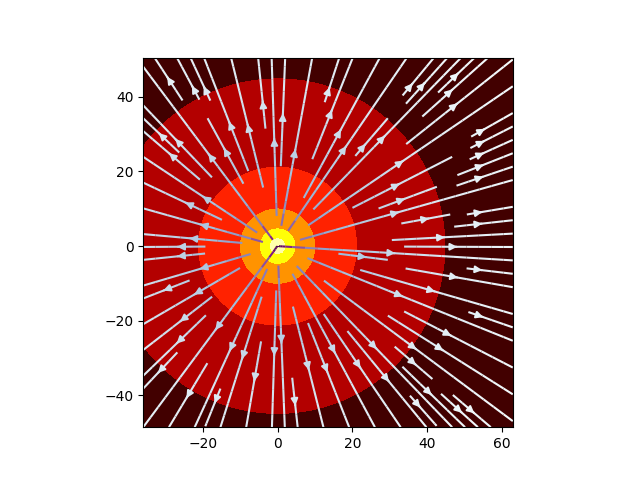

(-36.0, 63.0, -48.5, 50.5)

In [19]:
plt.contourf(xvals, yvals, rate[50,:,:], cmap='hot')
plt.streamplot(xvals, yvals, unit_vec[0,50,:,:], unit_vec[1,50,:,:], color=rate[50,:,:], cmap='BuPu')
plt.axis('square')

Nemo seems to be showing us the flow field from an explosion or something!

In [20]:
plt.close()

Now let's look at the `city data` table:

In [21]:
city_data = demo[4]

In [22]:
print(city_data.readme)

This file contains the coordinates and populations of 1000 cities.


In [23]:
city_data

<city data: a Trieste Table>

What are the columns of the table? ...

In [24]:
city_data.column_names

('city', 'longitude', 'latitude', 'population')

What are the data types of each column? ...

In [25]:
city_data.column_types

{'city': dtype('<U20'),
 'latitude': dtype('float32'),
 'longitude': dtype('float32'),
 'population': dtype('int64')}

Let's look at the first 10 entries in the table, to get a feel for what's inside...

In [26]:
city_data[:10]

array([('New York',  -74.00594 , 40.712784, 8405837),
       ('Los Angeles', -118.24368 , 34.052235, 3884307),
       ('Chicago',  -87.6298  , 41.878113, 2718782),
       ('Houston',  -95.369804, 29.760427, 2195914),
       ('Philadelphia',  -75.16522 , 39.952583, 1553165),
       ('Phoenix', -112.074036, 33.448376, 1513367),
       ('San Antonio',  -98.49363 , 29.424122, 1409019),
       ('San Diego', -117.16109 , 32.715736, 1355896),
       ('Dallas',  -96.79699 , 32.776665, 1257676),
       ('San Jose', -121.88633 , 37.338207,  998537)],
      dtype=[('city', '<U20'), ('longitude', '<f4'), ('latitude', '<f4'), ('population', '<i8')])

Oh! It looks like this is a list of US cities, sorted from highest population to lowest. 

This table contains city coordinates, so we can create a scatter plot and scale the points so that cities with larger populations are larger...

In [27]:
lon = city_data['longitude']
lat = city_data['latitude']
pop = city_data['population']

<IPython.core.display.Javascript object>


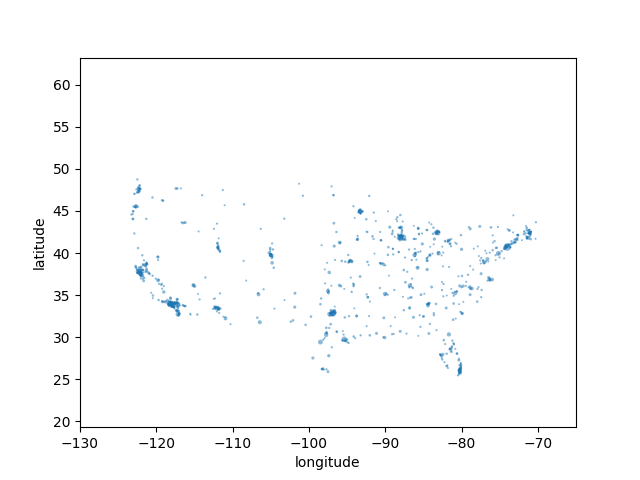

Text(0,0.5,'latitude')

In [28]:
sqrtpop = np.sqrt(pop)
normed_sqrtpop = sqrtpop/sqrtpop.max()
plt.scatter(lon, lat, s=30*normed_sqrtpop, linewidths=0, alpha=0.5)
plt.xlim((-130,-65))
plt.xlabel('longitude')
plt.ylabel('latitude')

In [29]:
plt.close()

We can also look at the distribution of populations...

<IPython.core.display.Javascript object>


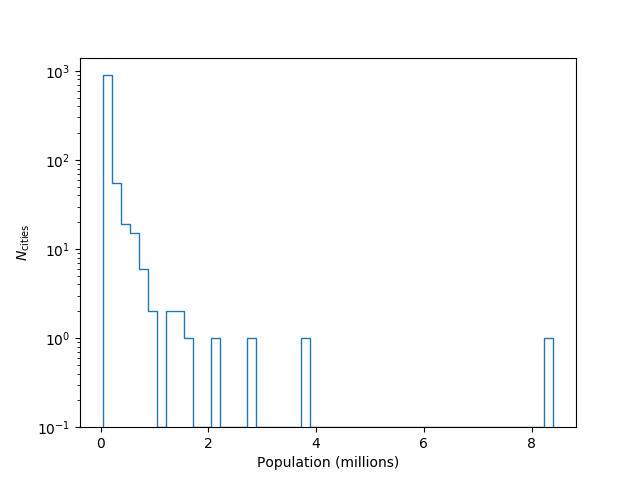

Text(0,0.5,'$N_{\\rm cities}$')

In [30]:
plt.hist(pop/1e6, bins=50, histtype='step', log=True)
plt.xlabel("Population (millions)")
plt.ylabel(r"$N_{\rm cities}$")

In [31]:
plt.close()

New York City (the one on the far right) is quite an outlier!

We could have also obtained a NumPy `RecArray`, like this:

In [32]:
cities = city_data.as_recarray()

Then, we can do things like search for all cities named Pasadena:

In [33]:
cities[cities.city == 'Pasadena']

rec.array([('Pasadena',  -95.2091  , 29.691063, 152735),
           ('Pasadena', -118.144516, 34.147785, 139731)],
          dtype=[('city', '<U20'), ('longitude', '<f4'), ('latitude', '<f4'), ('population', '<i8')])

and obtain a record for the 718th most populous city:

In [34]:
cities[718]

('Harrisonburg', -78.86891, 38.44957, 51395)

also:

In [35]:
hburg = cities[718]

In [36]:
hburg.city

'Harrisonburg'

In [37]:
hburg.longitude, hburg.latitude

(-78.86891, 38.44957)

To do more complicated things with tables, it's helpful to use Pandas:

In [38]:
import pandas as pd

In [39]:
cities = pd.DataFrame(city_data.data)

In [40]:
cities[:15]

,city,longitude,latitude,population
0,New York,-74.005943,40.712784,8405837
1,Los Angeles,-118.243683,34.052235,3884307
2,Chicago,-87.629799,41.878113,2718782
3,Houston,-95.369804,29.760427,2195914
4,Philadelphia,-75.165222,39.952583,1553165
5,Phoenix,-112.074036,33.448376,1513367
6,San Antonio,-98.493629,29.424122,1409019
7,San Diego,-117.161087,32.715736,1355896
8,Dallas,-96.796989,32.776665,1257676
9,San Jose,-121.886330,37.338207,998537


In [41]:
cities.loc[cities.city == 'Pasadena']

,city,longitude,latitude,population
158,Pasadena,-95.209099,29.691063,152735
182,Pasadena,-118.144516,34.147785,139731
